<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva (encontrar la vista aérea)  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/carretera.png" align="middle" style="width:550px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [2]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 2-A

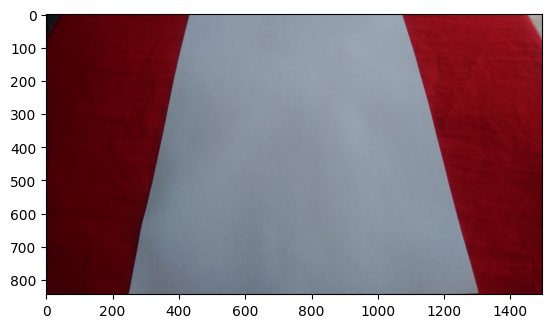

In [3]:
img=cv.imread("figuras/hoja.jpeg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

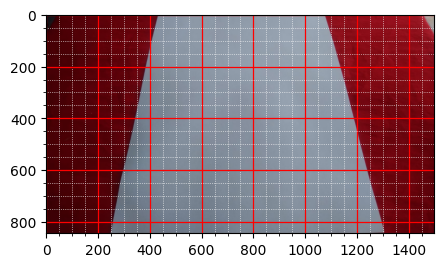

In [4]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

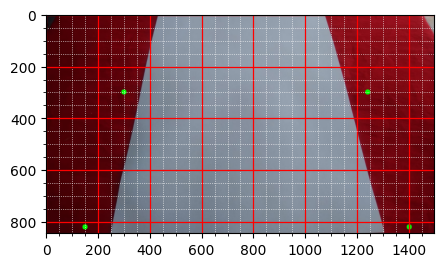

In [5]:
P1=(300,300)
P2=(1240,300)
P3=(150,820)
P4=(1400,820)

img=cv.imread("figuras/hoja.jpeg")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.circle(img, P1, 10, (0,255,0), -1 )
cv.circle(img, P2, 10, (0,255,0), -1 )
cv.circle(img, P3, 10, (0,255,0), -1 )
cv.circle(img, P4, 10, (0,255,0), -1 )

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

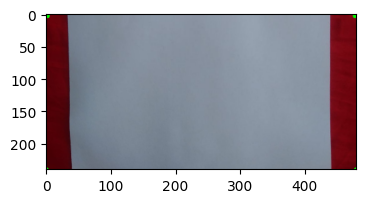

In [6]:
ratio=1
altura=240*ratio
ancho=480*ratio

pts1=np.float32([P1, P2, P3, P4])
pts2=np.float32([[0,0] , [ancho,0], [0, altura], [ancho, altura]])

matrix = cv.getPerspectiveTransform(pts1, pts2)
img_NewPerspective = cv.warpPerspective(img, matrix, (ancho,altura))

plt.figure(figsize = (4,4))
plt.imshow(img_NewPerspective)
plt.show()

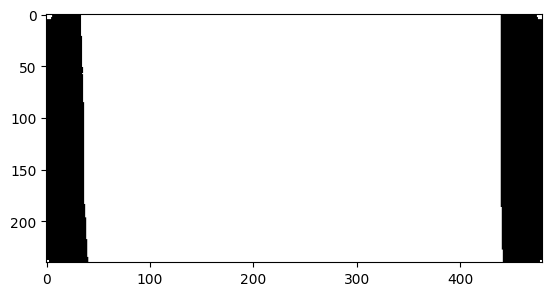

In [9]:
img_gray=cv.cvtColor(img_NewPerspective, cv.COLOR_BGR2GRAY)
img_gauss=cv.GaussianBlur(img_gray ,(3,3),0)
_, img_thr = cv.threshold( img_gauss,90,255,cv.THRESH_BINARY)
plt.imshow(img_thr,cmap='gray')
plt.show()

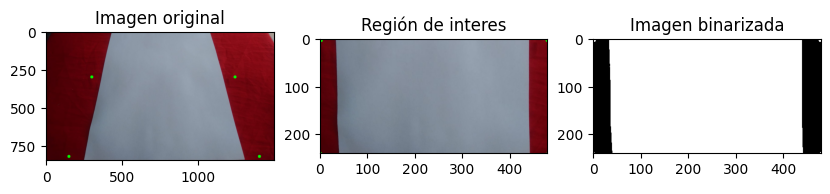

In [10]:
plt.figure(figsize=(10,6))
#imagen original
plt.subplot(2,3,1)
plt.imshow(img)
plt.title("Imagen original")
#imagen reg int
plt.subplot(2,3,2)
plt.imshow(img_NewPerspective)
plt.title("Región de interes")
#Imagen bin
plt.subplot(2,3,3)
plt.imshow(img_thr,cmap='gray')
plt.title("Imagen binarizada")
plt.show()

# Actividad 2-B